## Import Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Neural Networks for Regression_TF

/content/drive/MyDrive/Neural Netwrok for Regression_TensorFlow


In [ ]:
data = pd.read_csv("Regression_Data.csv")

In [ ]:
data

,Ind_Data,Dependent_Data
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
X = data['Ind_Data'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y = data['Dependent_Data'].values.reshape(-1,1)
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

## Visualize the data

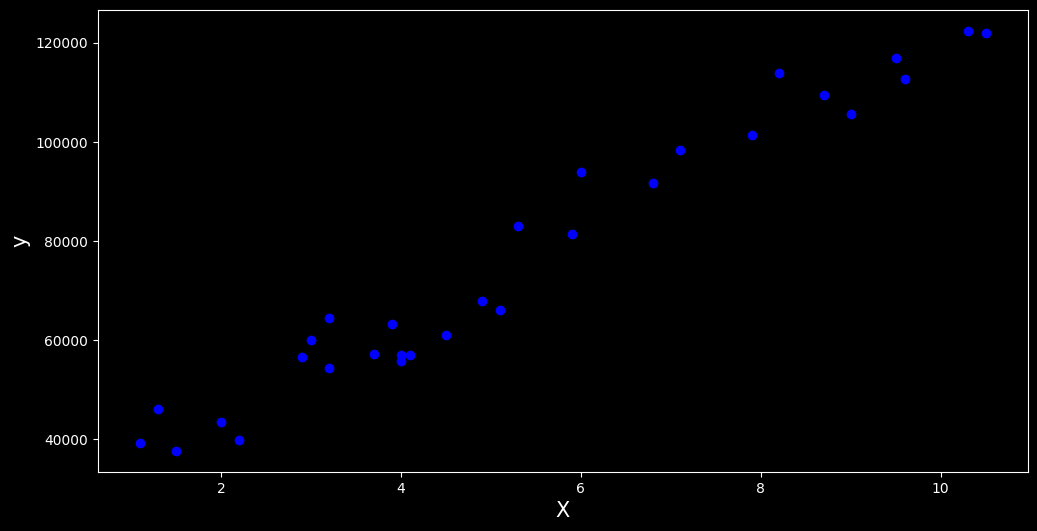

In [ ]:
plt.figure(figsize =(12,6))
plt.scatter(X, y,color = 'b')
plt.ylabel('y', fontsize = 15)
plt.xlabel('X', fontsize = 15);

## Create Neural Network Model

In [ ]:
model = Sequential()

model.add(Dense(units = 1, input_shape = (1,), activation = None)) # activations = None since the model is linear

# units = 1 means output dimension is one.
# input_shape = 1 means one input feature.

In [ ]:
model.summary() # There are two parameters to train. One is weight and one is bias

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Setting the Parameters

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001) ,loss='mse')

# Training the Neural Network

In [ ]:
hist = model.fit(X,y, epochs = 500)  # try 5000 epochs

Epoch 1/500
1/1 [==============================] - 1s 527ms/step - loss: 6502809600.0000
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 5602485248.0000
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 4829815296.0000
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 4166696192.0000
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 3597593856.0000
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 3109177856.0000
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 2690004736.0000
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 2330256896.0000
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 2021507456.0000
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1756524672.0000
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 1529102464.0000
Epoch 12/500
1/1 [===============

# Plotting Loss Vs Epochs

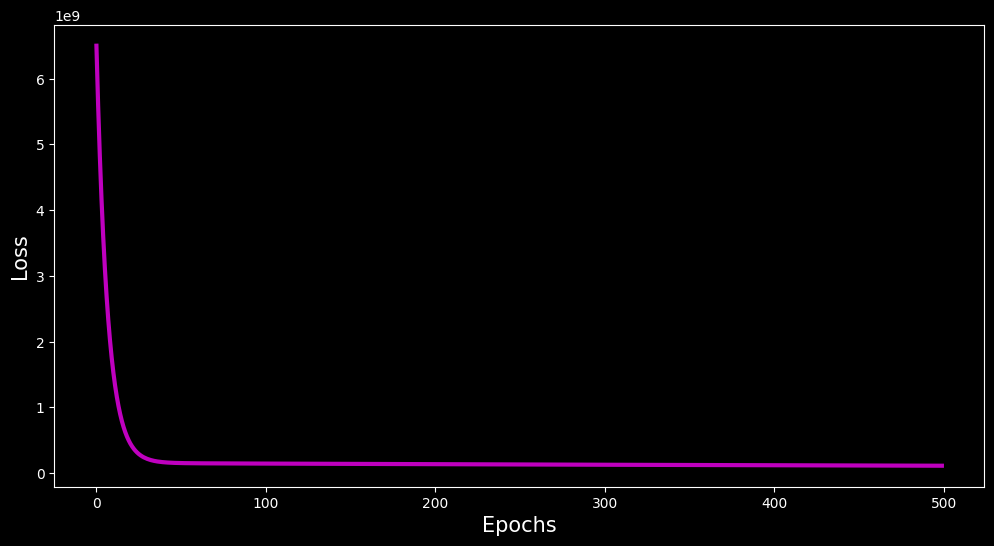

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias of the Trained Model

In [ ]:
print("Weight is :" )
print(model.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model.layers[0].get_weights()[1])

Weight is :
[[12316.044]]
 
Bias is :
[6478.4375]


# Creating a test data

In [ ]:
test_data = np.linspace(0,11,30).reshape(-1,1)

In [ ]:
yt = model.predict(test_data)
yt

1/1 [==============================] - 0s 84ms/step


array([[  6478.4375],
       [ 11150.041 ],
       [ 15821.644 ],
       [ 20493.246 ],
       [ 25164.85  ],
       [ 29836.451 ],
       [ 34508.055 ],
       [ 39179.656 ],
       [ 43851.26  ],
       [ 48522.863 ],
       [ 53194.465 ],
       [ 57866.07  ],
       [ 62537.668 ],
       [ 67209.28  ],
       [ 71880.875 ],
       [ 76552.484 ],
       [ 81224.086 ],
       [ 85895.69  ],
       [ 90567.29  ],
       [ 95238.9   ],
       [ 99910.49  ],
       [104582.09  ],
       [109253.7   ],
       [113925.305 ],
       [118596.9   ],
       [123268.51  ],
       [127940.12  ],
       [132611.72  ],
       [137283.31  ],
       [141954.92  ]], dtype=float32)

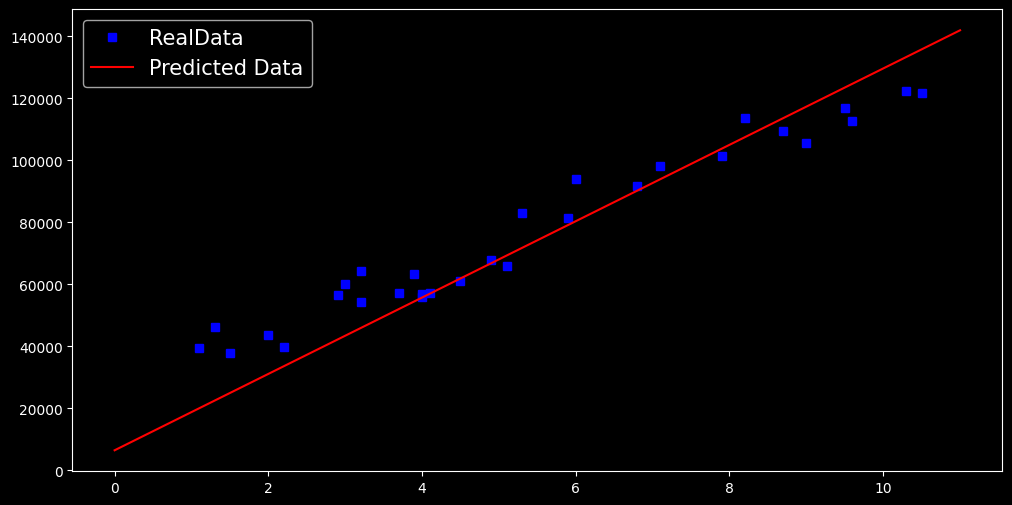

In [ ]:
plt.figure(figsize =(12,6))
plt.plot(X, y,'bs',label = 'RealData')
plt.plot(test_data, yt, 'r', label = 'Predicted Data')
plt.legend(fontsize = 15)
plt.show()

# Check the Performance of the Model

In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, yt)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y, yt)))
print('R2:', metrics.r2_score(y, yt))

RMSE: 16441.436119325503
MAE: 117.69684793707484
R2: 0.6279131502199871
